Select a file to plot:
1: HFW_EIS_NFMMO_0102750-2_1.5-4.3_C04.txt
2: HFW_EIS_NFMMO_192750-1_1.5-4.3_C06.txt
3: HFW_EIS_NFMMO_282750_1_C02.txt
4: HFW_EIS_NFMMO_372750-3_1.5-4_C14.txt
5: HFW_EIS_NFMMO-462750_1.5-4.3_C09.txt
6: HFW_EIS_NFMMO_642750-2_1.5-4.3_C01.txt
7: HFW_EIS_NFMMO_732750-2_1.5-4_C04.txt
8: HFW_EIS_NFMMO_822750-2_1.5-4_C02.txt
9: HFW_EIS_NFMMO_912750-5_1.5-4.3_C10.txt


Enter the number corresponding to the file you want to plot:  1


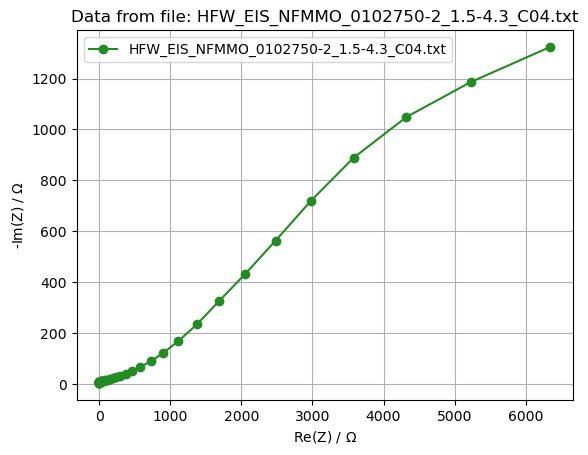

In [16]:
#Calculating angle

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

directory = '/Users/harryfyjis-walker/Desktop/Part II Stuff/EIS' 

file_list = [filename for filename in os.listdir(directory) if filename.endswith('.txt')]

def extract_six_number_code(filename):
    match = re.search(r'\d+', filename)
    if match:
        return match.group()
    else:
        return None

sorted_file_list = sorted(file_list, key=extract_six_number_code) 

color_mapping = {
    '0102750': 'forestgreen',
    '192750': 'darkseagreen',
    '282750': 'mediumturquoise',
    '372750': 'skyblue',
    '462750': 'dodgerblue',
    '642750': 'indigo',
    '732750': 'violet',
    '822750': 'hotpink',
    '912750': 'crimson'
}

def plot_file_data(filename):
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path, delimiter='\t')

    ImZ = df['-Im(Z)/Ohm'][15:80]
    ReZ = df['Re(Z)/Ohm'][15:80]

    plt.plot(ImZ, ReZ, marker='o', linestyle='-', label=filename, color=color_mapping.get(extract_six_number_code(filename), 'black'))

    plt.xlabel('Re(Z) / $\Omega$')
    plt.ylabel('-Im(Z) / $\Omega$')
    plt.grid(True)
    plt.legend()
    plt.title(f'Data from file: {filename}')

    plt.show()

print("Select a file to plot:")
for i, filename in enumerate(sorted_file_list):
    print(f"{i+1}: {filename}")

selected_index = int(input("Enter the number corresponding to the file you want to plot: ")) - 1

if 0 <= selected_index < len(sorted_file_list):
    selected_file = sorted_file_list[selected_index]
    plot_file_data(selected_file)
else:
    print("Invalid selection. Please enter a valid number.")


In [3]:
1

1

Select a file to plot:
1: HFW_EIS_NFMMO_0102750-4_1.5-4.3_C05.txt
2: HFW_EIS_NFMMO_0102750-2_1.5-4.3_C04.txt
3: HFW_EIS_NFMMO_192750-5_1.5-4.3_C08.txt
4: HFW_EIS_NFMMO_192750-1_1.5-4.3_C06.txt
5: HFW_EIS_NFMMO_282750_1_C02.txt
6: HFW_EIS_NFMMO_282750_2_C15.txt
7: HFW_EIS_NFMMO_372750-3_1.5-4_C14.txt
8: HFW_EIS_NFMMO-462750_1.5-4.3_C09.txt
9: HFW_EIS_NFMMO-462750_1.5-4_C10.txt
10: HFW_EIS_NFMMO_642750-2_1.5-4.3_C01.txt
11: HFW_EIS_NFMMO-642750_1_1.5-4.3_C09.txt
12: HFW_EIS_NFMMO_732750-1_1.5-4_C02.txt
13: HFW_EIS_NFMMO_732750-2_1.5-4_C04.txt
14: HFW_EIS_NFMMO_822750-2_1.5-4_C02.txt
15: HFW_EIS_NFMMO_912750-5_1.5-4.3_C10.txt


Enter the number corresponding to the file you want to plot:  1


Angle of line relative to x-axis: 71.34 degrees


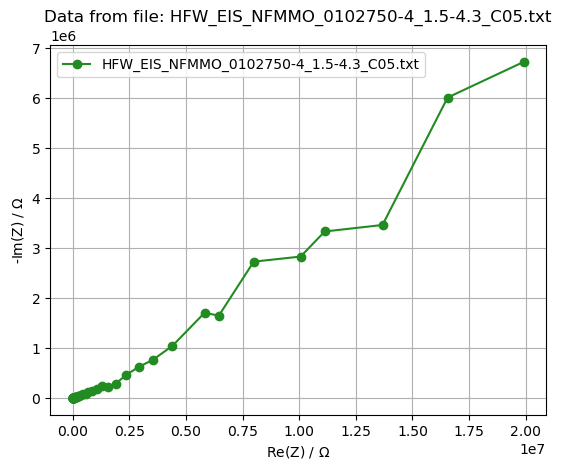

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from math import atan, degrees

# Define the directory where your text files are located
directory = '/Users/harryfyjis-walker/Desktop/Part II Stuff/EIS'  # Replace with the actual directory path

# Get a list of all text files in the directory
file_list = [filename for filename in os.listdir(directory) if filename.endswith('.txt')]

# Extract the six-number code from each filename using regular expressions
def extract_six_number_code(filename):
    match = re.search(r'\d+', filename)
    if match:
        return match.group()
    else:
        return None

# Sort the file list numerically based on the six-number code
sorted_file_list = sorted(file_list, key=extract_six_number_code) 

# Define colors based on six or seven consecutive numbers extracted from filenames
color_mapping = {
    '0102750': 'forestgreen',
    '192750': 'darkseagreen',
    '282750': 'mediumturquoise',
    '372750': 'skyblue',
    '462750': 'dodgerblue',
    '642750': 'indigo',
    '732750': 'violet',
    '822750': 'hotpink',
    '912750': 'crimson'
}

# Function to plot data from a specific file
def plot_file_data(filename):
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path, delimiter='\t')

    # Extract data from frerecip and ReZ columns
    ImZ = df['-Im(Z)/Ohm'][1:80]
    ReZ = df['Re(Z)/Ohm'][1:80]

    # Plot the data for this file with the six-number code as the label and the assigned color
    plt.plot(ImZ, ReZ, marker='o', linestyle='-', label=filename, color=color_mapping.get(extract_six_number_code(filename), 'black'))

    # Calculate the gradient (slope) of the best-fit line
    if len(ImZ) > 1:
        slope = (ImZ.iloc[-1] - ImZ.iloc[0]) / (ReZ.iloc[-1] - ReZ.iloc[0])
        angle = degrees(atan(slope))  # Calculate angle in degrees
        print(f"Angle of line relative to x-axis: {angle:.2f} degrees")

    # Customize the plot
    plt.xlabel('Re(Z) / $\Omega$')
    plt.ylabel('-Im(Z) / $\Omega$')
    plt.grid(True)
    plt.legend()
    plt.title(f'Data from file: {filename}')

    plt.show()

# Prompt the user to select a file to plot
print("Select a file to plot:")
for i, filename in enumerate(sorted_file_list):
    print(f"{i+1}: {filename}")

selected_index = int(input("Enter the number corresponding to the file you want to plot: ")) - 1

if 0 <= selected_index < len(sorted_file_list):
    selected_file = sorted_file_list[selected_index]
    plot_file_data(selected_file)
else:
    print("Invalid selection. Please enter a valid number.")
